**Изучение данных о зарплате в Data Science сфере по сведениям Glassdoor**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
sal=pd.read_csv('/Users/anastasiashubina/Downloads/Cleaned_DS_Jobs.csv')


Изучение датасета

Удаляю неинтересные и неинформативные столбцы

In [3]:
sal.drop(columns=['Salary Estimate', 'Job Description','python','excel', 'hadoop', 'spark', 'aws', 'tableau', 'same_state'],axis = 1, inplace=True)
sal.head()

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
0,Sr Data Scientist,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,data scientist,senior
1,Data Scientist,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,1,data scientist,na
2,Data Scientist,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,39,0,data scientist,na
3,Data Scientist,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,0,data scientist,na
4,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,0,data scientist,na


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Rating             660 non-null    float64
 2   Company Name       660 non-null    object 
 3   Location           660 non-null    object 
 4   Headquarters       660 non-null    object 
 5   Size               660 non-null    object 
 6   Type of ownership  660 non-null    object 
 7   Industry           660 non-null    object 
 8   Sector             660 non-null    object 
 9   Revenue            660 non-null    object 
 10  min_salary         660 non-null    int64  
 11  max_salary         660 non-null    int64  
 12  avg_salary         660 non-null    int64  
 13  job_state          660 non-null    object 
 14  company_age        660 non-null    int64  
 15  big_data           660 non-null    int64  
 16  job_simp           660 non

In [6]:
# only non-senior positions
ns=sal[sal['seniority']=='na']
ns

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
1,Data Scientist,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,1,data scientist,na
2,Data Scientist,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,39,0,data scientist,na
3,Data Scientist,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,0,data scientist,na
4,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,0,data scientist,na
5,Data Scientist,4.2,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,137,171,154,CA,10,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105,167,136,NJ,31,1,data scientist,na
656,Data Scientist,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,105,167,136,CA,-1,0,data scientist,na
657,Data Scientist,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,105,167,136,CA,-1,0,data scientist,na
658,Data Scientist,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105,167,136,CA,-1,1,data scientist,na


In [7]:
ns.shape

(567, 18)

In [8]:
sal[(sal['seniority']=='na') & (sal['Job Title']== 'Data Scientist')]

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
1,Data Scientist,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,1,data scientist,na
2,Data Scientist,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,39,0,data scientist,na
3,Data Scientist,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,0,data scientist,na
4,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,0,data scientist,na
5,Data Scientist,4.2,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,137,171,154,CA,10,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105,167,136,NJ,31,1,data scientist,na
656,Data Scientist,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,105,167,136,CA,-1,0,data scientist,na
657,Data Scientist,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,105,167,136,CA,-1,0,data scientist,na
658,Data Scientist,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105,167,136,CA,-1,1,data scientist,na


In [9]:
sal[~((sal['seniority']=='na') & (sal['Job Title']== 'Data Scientist'))]

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
0,Sr Data Scientist,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,data scientist,senior
6,Data Scientist / Machine Learning Expert,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),137,171,154,MA,24,0,data scientist,na
8,Staff Data Scientist - Analytics,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),137,171,154,CA,37,0,data scientist,na
12,"Data Scientist - Statistics, Early Career",3.7,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),137,171,154,WA,55,0,data scientist,na
13,Data Modeler,3.1,Old World Industries,"Northbrook, IL","Northbrook, IL",201 to 500 employees,Company - Private,Chemical Manufacturing,Manufacturing,$1 to $2 billion (USD),137,171,154,IL,47,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Data Science Software Engineer,4.8,Klaviyo,"Boston, MA","Boston, MA",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,92,155,123,MA,8,0,na,na
638,"Scientist / Group Lead, Cancer Biology",0.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,92,155,123,MA,-1,0,na,senior
639,AI Ops Data Scientist,4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),92,155,123,MD,107,0,data scientist,na
640,Senior Data Scientist,3.8,GutCheck,"Denver, CO","Denver, CO",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,$10 to $25 million (USD),105,167,136,CO,11,0,data scientist,senior


In [10]:
sal['avg_salary'].sort_values()

464     43
458     43
459     43
460     43
461     43
      ... 
512    271
513    271
514    271
501    271
507    271
Name: avg_salary, Length: 660, dtype: int64

In [11]:
sal.sort_values(by=['avg_salary'])

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
464,Data Scientist,4.0,Trexquant Investment,United States,"Stamford, CT",1 to 50 employees,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,31,56,43,US,8,0,data scientist,na
458,Data & Machine Learning Scientist,3.3,Tempus Labs,"Chicago, IL","Chicago, IL",501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,31,56,43,IL,5,0,mle,na
459,Data Scientist,4.0,Grid Dynamics,"Santa Clara, CA","San Ramon, CA",1001 to 5000 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,$50 to $100 million (USD),31,56,43,CA,14,1,data scientist,na
460,"VP, Data Science",3.9,7Park Data,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,31,56,43,NY,8,0,na,na
461,Senior Business Intelligence Analyst,3.7,Protolabs,"Maple Plain, MN","Maple Plain, MN",1001 to 5000 employees,Company - Public,Miscellaneous Manufacturing,Manufacturing,$100 to $500 million (USD),31,56,43,MN,21,0,analyst,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Data Scientist,3.8,"Aveshka, Inc.","Washington, DC","Arlington, VA",51 to 200 employees,Company - Public,IT Services,Information Technology,$10 to $25 million (USD),212,331,271,DC,10,1,data scientist,na
513,"Manager, Field Application Scientist, Southeast",4.2,10x Genomics,"Raleigh, NC","Pleasanton, CA",501 to 1000 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,212,331,271,NC,8,0,manager,na
514,COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPU...,3.9,Southwest Research Institute,"Dayton, OH","San Antonio, TX",1001 to 5000 employees,Nonprofit Organization,Research & Development,Business Services,$500 million to $1 billion (USD),212,331,271,OH,73,0,na,na
501,Data Scientist,3.6,Creative Circle,United States,"Los Angeles, CA",201 to 500 employees,Company - Public,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,212,331,271,US,18,0,data scientist,na


In [12]:
sal.sort_values(by=['avg_salary' , 'Rating'], ascending=[False, False])

,Job Title,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,big_data,job_simp,seniority
502,Data Scientist(s)/Machine Learning Engineer,5.0,Blue Horizon Tek Solutions,"New York, NY","Coconut Creek, FL",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,212,331,271,NY,33,0,data scientist,na
509,Data Science Software Engineer,4.8,Klaviyo,"Boston, MA","Boston, MA",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,212,331,271,MA,8,0,na,na
504,Data Scientist,4.7,Sharpedge Solutions Inc,"Seattle, WA","Lombard, IL",Unknown,Company - Private,Publishing,Media,Less than $1 million (USD),212,331,271,WA,-1,0,data scientist,na
516,Data Scientist,4.5,Smith Hanley Associates,"Washington, DC","New York, 061",1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,212,331,271,DC,40,0,data scientist,na
513,"Manager, Field Application Scientist, Southeast",4.2,10x Genomics,"Raleigh, NC","Pleasanton, CA",501 to 1000 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,212,331,271,NC,8,0,manager,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Data & Machine Learning Scientist,3.3,Tempus Labs,"Chicago, IL","Chicago, IL",501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,31,56,43,IL,5,0,mle,na
465,Data Scientist,3.0,Ameritas Life Insurance Corp,"Cincinnati, OH","Lincoln, NE",1001 to 5000 employees,Company - Private,Insurance Agencies & Brokerages,Insurance,$2 to $5 billion (USD),31,56,43,OH,133,0,data scientist,na
470,In-Line Inspection Data Analyst,2.9,Quest Integrity,"Tulsa, OK","Kent, WA",201 to 500 employees,Company - Public,Oil & Gas Services,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),31,56,43,OK,24,0,analyst,na
474,Data Scientist,2.9,"Pragmatics, Inc.",United States,"Reston, VA",201 to 500 employees,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),31,56,43,US,35,0,data scientist,na


In [13]:
sal['salary range']= sal['max_salary'] - sal['min_salary']
sal['salary range']

0      34
1      34
2      34
3      34
4      34
       ..
655    62
656    62
657    62
658    62
659    62
Name: salary range, Length: 660, dtype: int64

In [14]:
sal['seniority']=sal['seniority'].apply(lambda x: True if x == 'senior' else False)

In [15]:
sal['big_data']=sal['big_data'].apply(lambda x: True if x == 1 else False)

In [16]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Rating             660 non-null    float64
 2   Company Name       660 non-null    object 
 3   Location           660 non-null    object 
 4   Headquarters       660 non-null    object 
 5   Size               660 non-null    object 
 6   Type of ownership  660 non-null    object 
 7   Industry           660 non-null    object 
 8   Sector             660 non-null    object 
 9   Revenue            660 non-null    object 
 10  min_salary         660 non-null    int64  
 11  max_salary         660 non-null    int64  
 12  avg_salary         660 non-null    int64  
 13  job_state          660 non-null    object 
 14  company_age        660 non-null    int64  
 15  big_data           660 non-null    bool   
 16  job_simp           660 non

In [17]:
for col in ['Size', 'Type of ownership', 'Industry', 'Sector']:
    sal[col] = sal[col].astype('category')

In [18]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          660 non-null    object  
 1   Rating             660 non-null    float64 
 2   Company Name       660 non-null    object  
 3   Location           660 non-null    object  
 4   Headquarters       660 non-null    object  
 5   Size               660 non-null    category
 6   Type of ownership  660 non-null    category
 7   Industry           660 non-null    category
 8   Sector             660 non-null    category
 9   Revenue            660 non-null    object  
 10  min_salary         660 non-null    int64   
 11  max_salary         660 non-null    int64   
 12  avg_salary         660 non-null    int64   
 13  job_state          660 non-null    object  
 14  company_age        660 non-null    int64   
 15  big_data           660 non-null    bool    
 16  job_simp

In [19]:
sal['Size'].value_counts()

51 to 200 employees        128
1001 to 5000 employees     104
1 to 50 employees           84
201 to 500 employees        83
10000+ employees            79
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64

In [20]:
index= sal[(sal['Size'] =='Unknown')].index
sal.drop(index, inplace=True)
sal['Size'].value_counts()


51 to 200 employees        128
1001 to 5000 employees     104
1 to 50 employees           84
201 to 500 employees        83
10000+ employees            79
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                      0
Name: Size, dtype: int64

In [21]:
index= sal[(sal['Sector'] =='-1')].index
sal.drop(index, inplace=True)
sal['Sector'].value_counts()

Information Technology                178
Business Services                     118
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Insurance                              32
Finance                                31
Manufacturing                          23
Health Care                            21
Government                             16
Oil, Gas, Energy & Utilities           10
Retail                                  7
Transportation & Logistics              6
Telecommunications                      6
Media                                   4
Real Estate                             3
Travel & Tourism                        3
Accounting & Legal                      3
Education                               3
Agriculture & Forestry                  3
Consumer Services                       2
Construction, Repair & Maintenance      2
Non-Profit                              1
-1                                      0
Name: Sector, dtype: int64

In [22]:
sal['avg_salary'].describe()

count    584.000000
mean     122.809932
std       39.163507
min       43.000000
25%      103.000000
50%      114.000000
75%      136.000000
max      271.000000
Name: avg_salary, dtype: float64

In [23]:
q1 = sal['avg_salary'].quantile(0.25)
q3 = sal['avg_salary'].quantile(0.75)
iqr = q3 - q1
print(iqr)

33.0


In [24]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)


53.5
185.5


In [25]:
index = sal[(sal['avg_salary'] >= iqr_outlier_threshold_up)|(sal['avg_salary'] <= iqr_outlier_threshold_bottom)].index
sal.drop(index, inplace=True)
sal['avg_salary'].describe()

count    549.000000
mean     120.837887
std       27.154619
min       76.000000
25%      103.000000
50%      114.000000
75%      136.000000
max      185.000000
Name: avg_salary, dtype: float64

In [26]:
index = sal[(sal['avg_salary'] >= iqr_outlier_threshold_up)|(sal['avg_salary'] <= iqr_outlier_threshold_bottom)].index
sal.drop(index, inplace=True)
sal['avg_salary'].describe()

count    549.000000
mean     120.837887
std       27.154619
min       76.000000
25%      103.000000
50%      114.000000
75%      136.000000
max      185.000000
Name: avg_salary, dtype: float64

In [27]:
sal.describe()

,Rating,min_salary,max_salary,avg_salary,company_age,salary range
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,3.824590,97.398907,144.624772,120.837887,33.315118,47.225865
std,0.735912,24.434018,32.564050,27.154619,41.044005,19.420528
min,0.000000,56.000000,97.000000,76.000000,-1.000000,4.000000
25%,3.400000,79.000000,119.000000,103.000000,8.000000,33.000000
50%,3.800000,91.000000,132.000000,114.000000,20.000000,52.000000
75%,4.300000,112.000000,163.000000,136.000000,42.000000,62.000000
max,5.000000,145.000000,225.000000,185.000000,239.000000,84.000000


In [28]:
index= sal[(sal['company_age'] ==-1)].index
sal.drop(index, inplace=True)
sal['company_age'].describe()


count    503.00000
mean      36.45328
std       41.48745
min        1.00000
25%       10.00000
50%       21.00000
75%       46.00000
max      239.00000
Name: company_age, dtype: float64

In [29]:
sal.corr()

,Rating,min_salary,max_salary,avg_salary,company_age,big_data,seniority,salary range
Rating,1.000000,0.005487,-0.038933,-0.021103,-0.189252,0.021985,0.008636,-0.071741
min_salary,0.005487,1.000000,0.800905,0.933151,-0.031842,-0.009527,-0.006087,0.075228
max_salary,-0.038933,0.800905,1.000000,0.962559,-0.031066,0.003660,-0.026577,0.657345
avg_salary,-0.021103,0.933151,0.962559,1.000000,-0.032765,-0.001627,-0.019724,0.428561
company_age,-0.189252,-0.031842,-0.031066,-0.032765,1.000000,-0.001747,0.015967,-0.011660
big_data,0.021985,-0.009527,0.003660,-0.001627,-0.001747,1.000000,0.010896,0.018085
seniority,0.008636,-0.006087,-0.026577,-0.019724,0.015967,0.010896,1.000000,-0.036597
salary range,-0.071741,0.075228,0.657345,0.428561,-0.011660,0.018085,-0.036597,1.000000


<AxesSubplot:xlabel='salary range', ylabel='max_salary'>

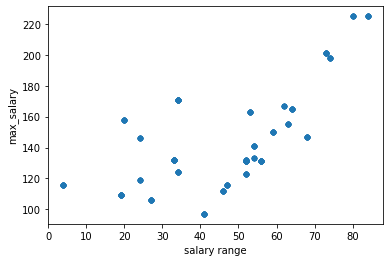

In [30]:
sal.plot('salary range','max_salary', kind='scatter')

Найдена положительная корреляционная взаимосвязь между величиной максимальной зараплаты на позиции и зарплатным разрывом по этой позиции. На позициях, предлагающих максимальный доход, сильно неравенство в оплате труда между работниками. Или же такие позиции публикуются без учета грейдов работников. 


<AxesSubplot:xlabel='min_salary', ylabel='max_salary'>

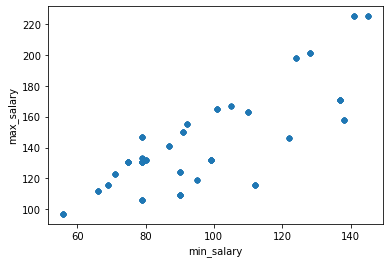

In [31]:
sal.plot('min_salary','max_salary', kind='scatter')

Также существует довольно сильная корреляция между величиной минимальной и максимальной зарплаты, которая может свидетельствовать о том, что, хотя как мы сказали ранее присутвует неравенство, в целом на доходных позициях минимальные зарплаты тоже выше.

In [32]:
sec_sal = sal.groupby(sal['Sector'])['avg_salary'].mean()
sec_sal 

Sector
-1                                           NaN
Accounting & Legal                           NaN
Aerospace & Defense                   126.741935
Agriculture & Forestry                103.666667
Biotech & Pharmaceuticals             116.067797
Business Services                     120.093750
Construction, Repair & Maintenance    106.000000
Consumer Services                            NaN
Education                             102.500000
Finance                               120.689655
Government                            136.062500
Health Care                           118.333333
Information Technology                119.591195
Insurance                             113.322581
Manufacturing                         126.681818
Media                                 126.000000
Non-Profit                                   NaN
Oil, Gas, Energy & Utilities          107.444444
Real Estate                           116.666667
Retail                                146.400000
Telecommunica

<BarContainer object of 503 artists>

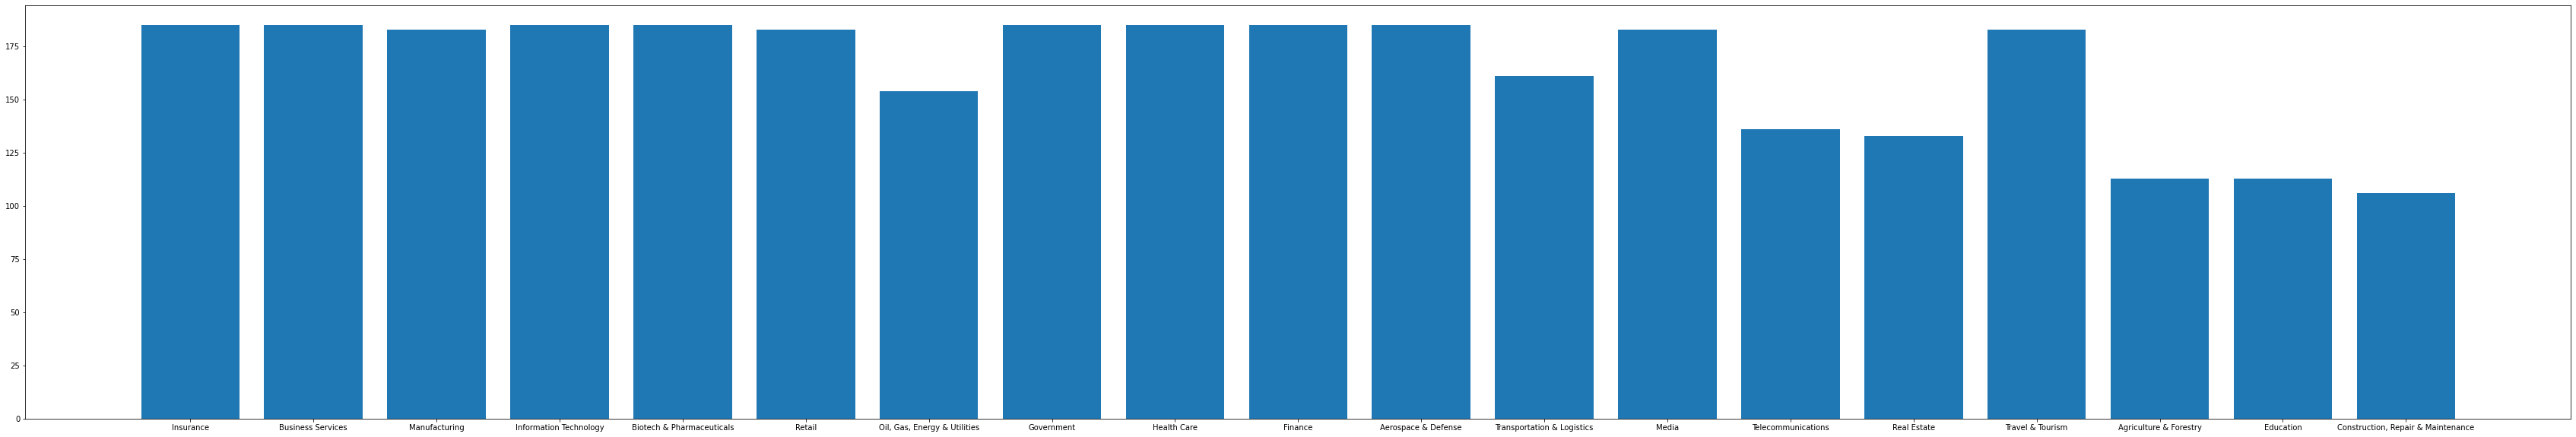

In [33]:
fig, ax = plt.subplots(figsize=(60,10))

ax.bar(sal['Sector'], sal['avg_salary'])

Такие сектора как Oil, Gas and Energy, Transportation, Telecommunication, Real estate, Agriculture, Education, Construction отличаются значительно более низкими доходами на data science должностях. 

In [34]:
size_sal = sal.groupby(sal['Size'])['avg_salary'].mean()
size_sal 

Size
-1                                NaN
1 to 50 employees          117.317073
10000+ employees           118.859155
1001 to 5000 employees     120.989362
201 to 500 employees       117.000000
5001 to 10000 employees    123.808511
501 to 1000 employees      117.898551
51 to 200 employees        122.914286
Unknown                           NaN
Name: avg_salary, dtype: float64

<BarContainer object of 503 artists>

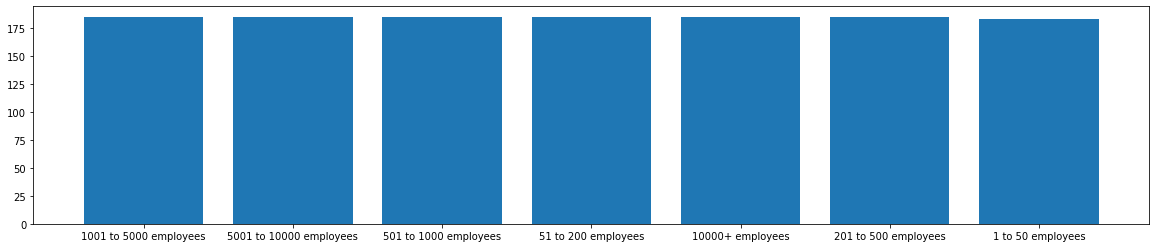

In [35]:
fig, ax = plt.subplots(figsize=(20,4))

ax.bar(sal['Size'], sal['avg_salary'])

Не наблюдается существенной разницы между уровнем заработной платы в организациях различного размера.

In [37]:
senior_sal = sal.groupby(sal['seniority'])['avg_salary'].mean()
senior_sal 

seniority
False    120.257683
True     118.812500
Name: avg_salary, dtype: float64

<BarContainer object of 503 artists>

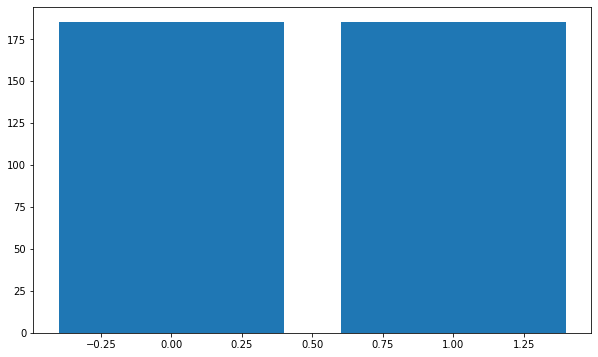

In [39]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(sal['seniority'], sal['avg_salary'])

На удивление, между позициями, помеченными как Senior и нет не наблюдается сильной разницы в оплате. Что подтверждает нашу мысль о размытых и/или не указанных грейдах.